<a href="https://colab.research.google.com/github/EliasPrinceP/N_networks/blob/master/E-Commerce%20(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-Commerce Shipping Data**







**An international e-commerce firm seeks to glean vital information from its consumer database.** **They intend to research their clients using some of the most modern machine learning techniques.** **The firm sells electronic goods.**

Importing Required Libraries for Execution

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


Dataset Loading

In [2]:
df=pd.read_csv('/content/Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**DATA ANALYSIS**

In [3]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [4]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [5]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**DATA PROCESSING**





In [7]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [9]:
df.shape

(10999, 12)

Performing **LabelEncoder**

In [10]:
le=LabelEncoder()
lst=['Gender','Product_importance','Warehouse_block','Mode_of_Shipment']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [11]:
df.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

Droping unwanted features

In [12]:
df.drop(labels=['ID'],axis=1,inplace=True)

Separating X and Y variables

In [13]:
X=df.iloc[:,:-1]
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,0,44,1233
1,4,0,4,5,216,2,1,1,59,3088
2,0,0,2,2,183,4,1,1,48,3374
3,1,0,3,3,176,4,2,1,10,1177
4,2,0,2,2,184,3,2,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538
10995,1,2,4,1,232,5,2,0,6,1247
10996,2,2,5,4,242,5,1,0,4,1155
10997,4,2,5,2,223,6,2,1,2,1210


In [14]:
y=df.iloc[:,-1]
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

**DATA VISUALIZATION**

**BARPLOT**

<Axes: xlabel='Warehouse_block', ylabel='Mode_of_Shipment'>

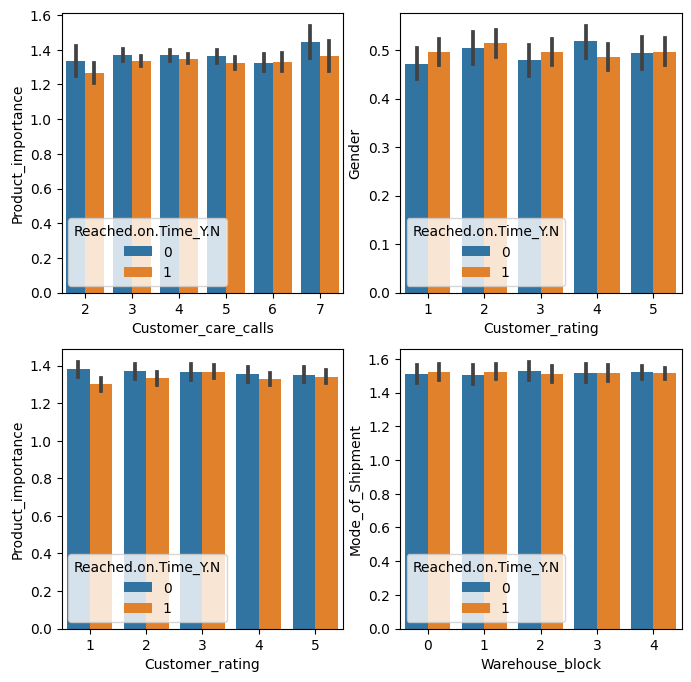

In [15]:
fig,axis=plt.subplots(2,2,figsize=(8,8))
sns.barplot(x='Customer_care_calls',y='Product_importance',hue='Reached.on.Time_Y.N',data=df,ax=axis[0,0])
sns.barplot(x='Customer_rating',y='Gender',hue='Reached.on.Time_Y.N',data=df,ax=axis[0,1])
sns.barplot(x='Customer_rating',y='Product_importance',hue='Reached.on.Time_Y.N',data=df,ax=axis[1,0])
sns.barplot(x='Warehouse_block',y='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,ax=axis[1,1])

**DISPLOT**

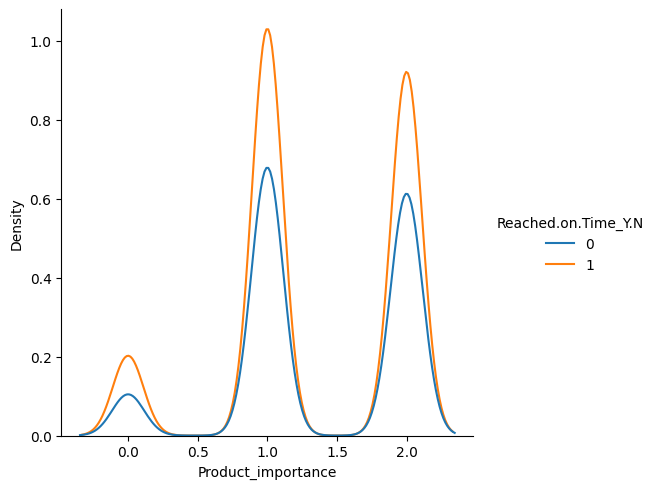

In [16]:
sns.displot(df,hue='Reached.on.Time_Y.N',x='Product_importance',kind='kde')

**HEATMAP**

<Axes: >

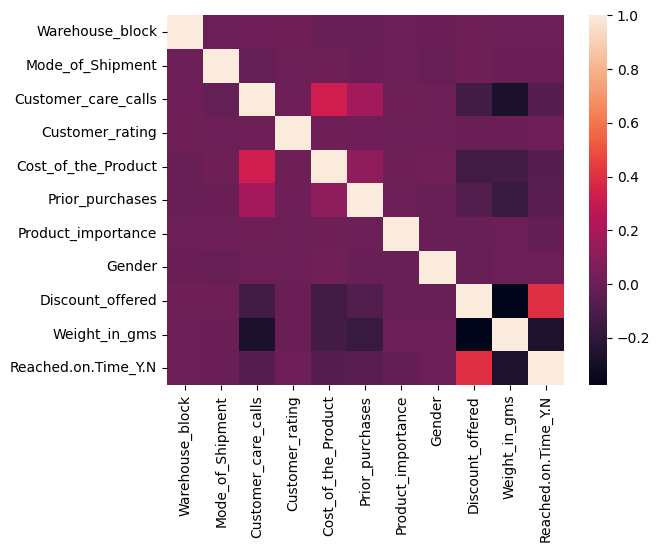

In [17]:
sns.heatmap(df.corr())

**COUNTPLOT**

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

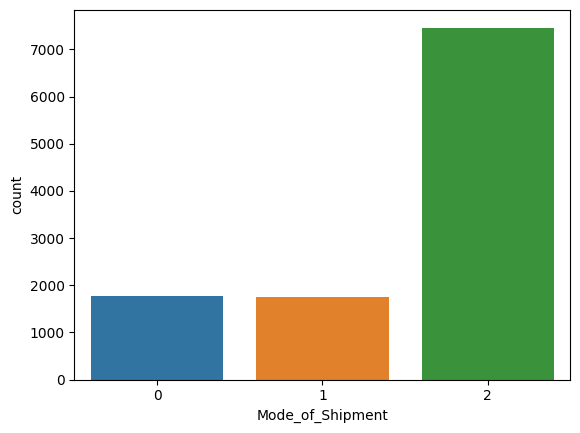

In [18]:
sns.countplot(x='Mode_of_Shipment',data=df)

**Pie-Chart** (To check the dataset is balanced or not)

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


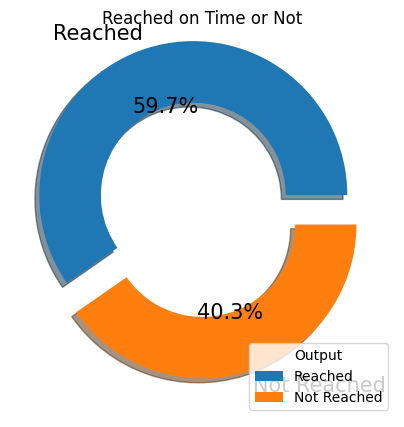

In [19]:
X1=df['Reached.on.Time_Y.N'].value_counts()
print(X1)
new=['Reached','Not Reached']
plt.figure(figsize=(5,5))
plt.pie(X1,explode=[0.2,0],labels=new,shadow=True,autopct='%2.1f%%',wedgeprops={'width':0.4},textprops={'fontsize':15})
plt.title('Reached on Time or Not')
plt.legend(title='Output')
plt.show()


**Normalising the Dataset by StandardScaler**


In [20]:
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.4471892 , -2.00415767, -0.04771132, ..., -0.99176046,
         1.88998336, -1.46823975],
       [ 1.11803399, -2.00415767, -0.04771132, ...,  1.00830799,
         2.81563557, -0.33389333],
       [-1.56534517, -2.00415767, -1.79988745, ...,  1.00830799,
         2.13682395, -0.15900218],
       ...,
       [-0.22365559,  0.63834175,  0.82837675, ..., -0.99176046,
        -0.57842252, -1.51593733],
       [ 1.11803399,  0.63834175,  0.82837675, ...,  1.00830799,
        -0.70184282, -1.48230442],
       [ 0.4471892 ,  0.63834175, -1.79988745, ..., -0.99176046,
        -0.45500223, -1.2199677 ]])

In [21]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=1)

**Finding the Accuracy Score using different Algorithms**
1.  **Random Forest Classifier**
2.  **KNeighborsClassifier**
3.  **SVM**
4.  **Naive Baye's**






In [22]:
Rfc=RandomForestClassifier(n_estimators=25,criterion='entropy')
Knn=KNeighborsClassifier(n_neighbors=3)
Sv=SVC(kernel='rbf')
Nb=BernoulliNB()
lst=[Knn,Sv,Nb,Rfc]
score=[]
for i in lst:
  print('*'*100)
  i.fit(Xtrain,ytrain)
  ypred=i.predict(Xtest)
  print('Accuracy Score of',i,accuracy_score(ypred,ytest)*100)
  model_score=accuracy_score(ypred,ytest)*100
  score.append(model_score)



****************************************************************************************************
Accuracy Score of KNeighborsClassifier(n_neighbors=3) 64.27272727272727
****************************************************************************************************
Accuracy Score of SVC() 67.21212121212122
****************************************************************************************************
Accuracy Score of BernoulliNB() 68.18181818181817
****************************************************************************************************
Accuracy Score of RandomForestClassifier(criterion='entropy', n_estimators=25) 65.0


Dataframe of Different Accuracys

In [23]:
Algorithm_Used=["KNN",'SVM','NAIVE BAYES','RANDOM FOREST']
Accuracy=score
d=pd.DataFrame({'Algorithm':Algorithm_Used,'Accuracy':Accuracy},index=[1,2,3,4])
d.style.highlight_max(subset='Accuracy',color='blue')

,Algorithm,Accuracy
1,KNN,64.272727
2,SVM,67.212121
3,NAIVE BAYES,68.181818
4,RANDOM FOREST,65.000000


Performing dataset Balancing using **SMOTEENN**

In [24]:
smo=SMOTEENN()
Xsmo,ysmo=smo.fit_resample(X,y)
Xsmo

array([[-0.89450038, -0.68290796,  1.70446482, ...,  1.00830799,
        -0.33158193,  0.85426575],
       [ 0.4471892 , -0.68290796, -0.04771132, ...,  1.00830799,
        -0.51671238,  0.60415918],
       [ 1.11803399, -0.68290796, -0.92379938, ...,  1.00830799,
        -0.39329208,  0.88728716],
       ...,
       [-1.56534517, -2.00415767,  0.82837675, ...,  1.00830799,
        -0.70184282,  0.98940891],
       [ 0.4471892 ,  0.63834175, -0.04771132, ..., -0.99176046,
        -0.57842252, -1.21385263],
       [-1.56534517,  0.63834175,  0.82837675, ...,  1.00830799,
        -0.39329208, -1.22975182]])

In [25]:
ysmo

0       0
1       0
2       0
3       0
4       0
       ..
6014    1
6015    1
6016    1
6017    1
6018    1
Name: Reached.on.Time_Y.N, Length: 6019, dtype: int64

Pie-Chart after balancing

0    3046
1    2973
Name: Reached.on.Time_Y.N, dtype: int64


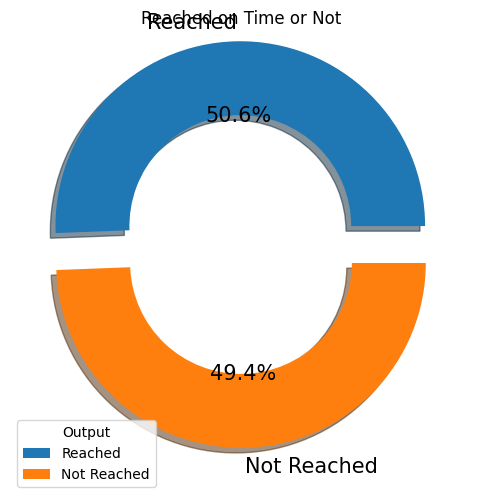

In [26]:
X2=ysmo.value_counts()
print(X2)
new=['Reached','Not Reached']
plt.figure(figsize=(6,6))
plt.pie(X2,explode=[0.2,0],labels=new,shadow=True,autopct='%2.1f%%',wedgeprops={'width':0.4},textprops={'fontsize':15})
plt.title('Reached on Time or Not')
plt.legend(title='Output')
plt.show()

Performing Train Test Split

In [27]:
Xtrain_s,Xtest_s,ytrain_s,ytest_s=train_test_split(Xsmo,ysmo,test_size=.3,random_state=1)

Finding the Accuracy Score using different Algorithms

In [28]:
Rfc=RandomForestClassifier(n_estimators=25,criterion='entropy')
Knn=KNeighborsClassifier(n_neighbors=3)
Sv=SVC(kernel='rbf')
Nb=BernoulliNB()
lst=[Knn,Sv,Nb,Rfc]
score1=[]
for i in lst:
  print('*'*100)
  i.fit(Xtrain_s,ytrain_s)
  ypred_s=i.predict(Xtest_s)
  print('Accuracy Score of',i,accuracy_score(ypred_s,ytest_s)*100)
  model_score=accuracy_score(ypred_s,ytest_s)*100
  score1.append(model_score)

****************************************************************************************************
Accuracy Score of KNeighborsClassifier(n_neighbors=3) 95.79180509413068
****************************************************************************************************
Accuracy Score of SVC() 94.35215946843853
****************************************************************************************************
Accuracy Score of BernoulliNB() 93.4108527131783
****************************************************************************************************
Accuracy Score of RandomForestClassifier(criterion='entropy', n_estimators=25) 95.51495016611295


In [29]:
Algorithm_Used=["KNN",'SVM','NAIVE BAYES','RANDOM FOREST']
Accuracy1=score1
dt=pd.DataFrame({'Algorithm':Algorithm_Used,'Accuracy':Accuracy},index=[1,2,3,4])
dt.style.highlight_max(subset='Accuracy',color='violet')

,Algorithm,Accuracy
1,KNN,64.272727
2,SVM,67.212121
3,NAIVE BAYES,68.181818
4,RANDOM FOREST,65.000000


Description of the Dataset

In [30]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


**Principal Component Analysis (PCA)**

In [31]:
pca=PCA(n_components=7)
Xtrain_pca=pca.fit_transform(Xtrain)
Xtest_pca=pca.transform(Xtest)
Xtrain_pca

array([[-1.15014946e+00, -3.13624837e-01,  6.76357294e-01, ...,
        -1.21278819e+00, -3.10135578e-01, -3.91383831e-01],
       [-9.89429537e-01,  3.75437461e+00, -2.32795683e-01, ...,
         1.80398775e+00,  1.68422192e-01,  3.66380818e-01],
       [ 1.86770705e-03,  1.11276965e+00,  1.04880422e+00, ...,
         8.59097342e-01, -7.51436374e-01, -9.79244187e-01],
       ...,
       [-1.84978737e-02,  1.16010819e+00,  7.10917312e-01, ...,
        -1.11338695e+00, -6.26904811e-01, -4.61116654e-01],
       [ 1.31043466e-01, -9.85544322e-01,  1.44738289e+00, ...,
         9.17775724e-01,  1.19392627e+00, -2.09557198e-01],
       [-1.24737310e+00,  2.70985348e+00,  7.60367084e-01, ...,
        -9.51826344e-01, -1.18365582e+00, -6.34739592e-01]])

In [32]:
Xtest_pca

array([[-1.19045069e+00, -1.30841286e+00,  9.09963953e-01, ...,
         2.17606698e-01, -7.67868956e-01, -1.01860501e+00],
       [-8.57032687e-01,  2.30093875e+00, -2.98582953e-01, ...,
        -1.50131037e+00,  1.78605520e-01, -1.32476335e+00],
       [ 2.04744344e+00, -3.73504966e-01, -1.52089755e+00, ...,
         5.59878515e-01,  4.27144795e-04, -2.22169325e-01],
       ...,
       [-1.08801882e+00, -2.39752885e-01, -5.92783896e-01, ...,
         5.94093540e-03, -4.14589622e-01,  5.56612085e-01],
       [-1.19603069e+00, -2.19884997e-01, -3.35291629e-01, ...,
        -1.38330631e+00, -6.51926418e-02, -1.10932423e+00],
       [-1.90301587e+00, -8.22929749e-01,  7.89697381e-01, ...,
        -5.54495467e-01, -3.73884318e-01, -6.96957612e-01]])

In [33]:
Rfc=RandomForestClassifier(n_estimators=25,criterion='entropy')
Knn=KNeighborsClassifier(n_neighbors=3)
Sv=SVC(kernel='rbf')
Nb=BernoulliNB()
lst=[Knn,Sv,Nb,Rfc]
score2=[]
for i in lst:
  print('*'*100)
  i.fit(Xtrain_pca,ytrain)
  ypred_pca=i.predict(Xtest_pca)
  print('Accuracy Score of',i,accuracy_score(ypred_pca,ytest)*100)
  model_score=accuracy_score(ypred_pca,ytest)*100
  score2.append(model_score)

****************************************************************************************************
Accuracy Score of KNeighborsClassifier(n_neighbors=3) 63.121212121212125
****************************************************************************************************
Accuracy Score of SVC() 66.42424242424242
****************************************************************************************************
Accuracy Score of BernoulliNB() 65.42424242424244
****************************************************************************************************
Accuracy Score of RandomForestClassifier(criterion='entropy', n_estimators=25) 64.75757575757576


In [34]:
Algorithm_Used=["KNN",'SVM','NAIVE BAYES','RANDOM FOREST']
Accuracy2=score2
data=pd.DataFrame({'Algorithm':Algorithm_Used,'Accuracy':Accuracy},index=[1,2,3,4])
data.style.highlight_max(subset='Accuracy',color='orange')

,Algorithm,Accuracy
1,KNN,64.272727
2,SVM,67.212121
3,NAIVE BAYES,68.181818
4,RANDOM FOREST,65.000000


**OUTLIER Detection**

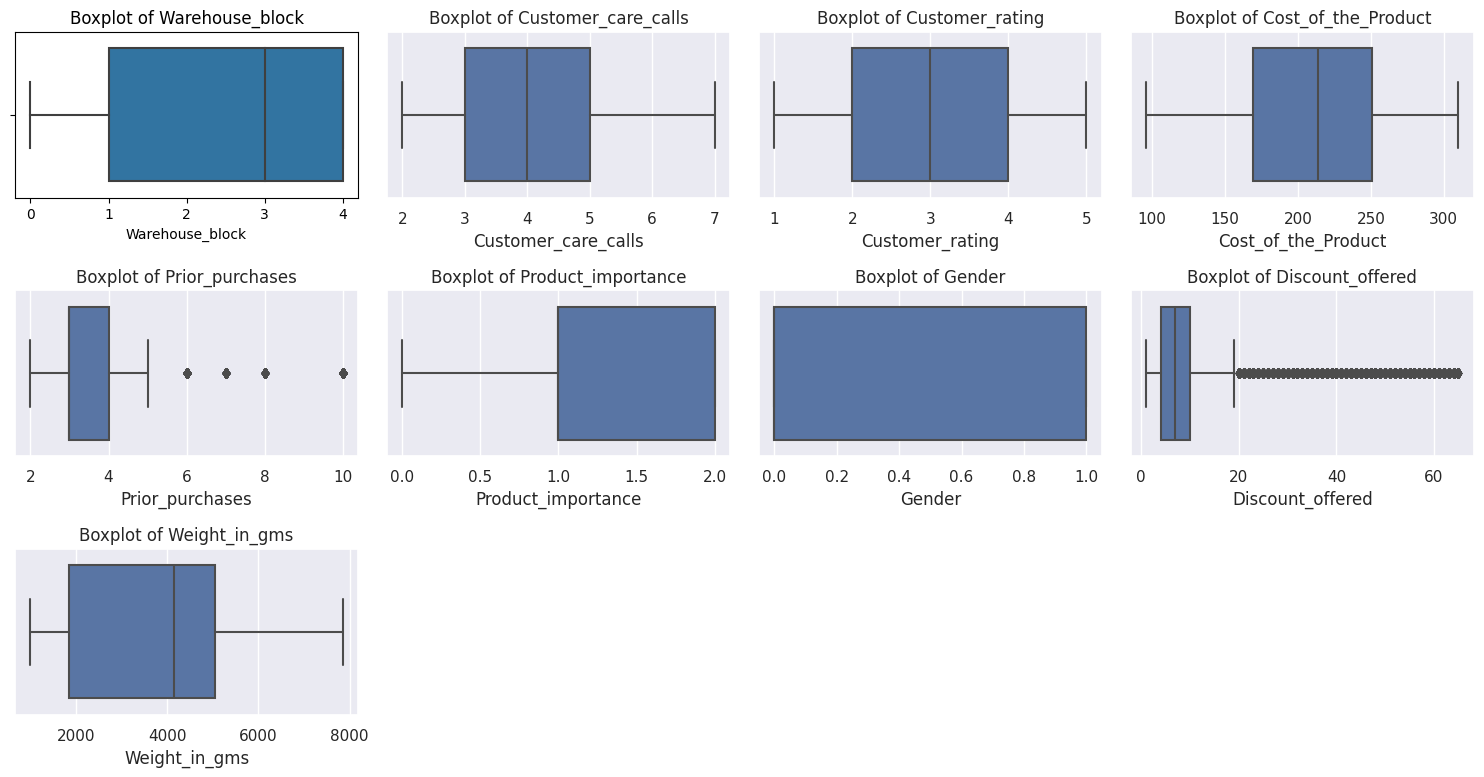

In [35]:
attributes= ["Warehouse_block","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Product_importance","Gender","Discount_offered","Weight_in_gms"]
plt.figure(figsize=(15,10))
for i,j in zip(range(1,10),attributes):
    plt.subplot(4,4,i)
    sns.boxplot(data=df, x=j)
    plt.tight_layout()
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

**CAPPING of OUTLIERS**

In [36]:
df1 = df.copy()
def remove_outliers_IQR(col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col]>upper_limit]

In [37]:
remove_outliers_IQR('Prior_purchases')

Upper limit 5.5
Lower limit 1.5


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [38]:
remove_outliers_IQR('Discount_offered')

Upper limit 19.0
Lower limit -5.0


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


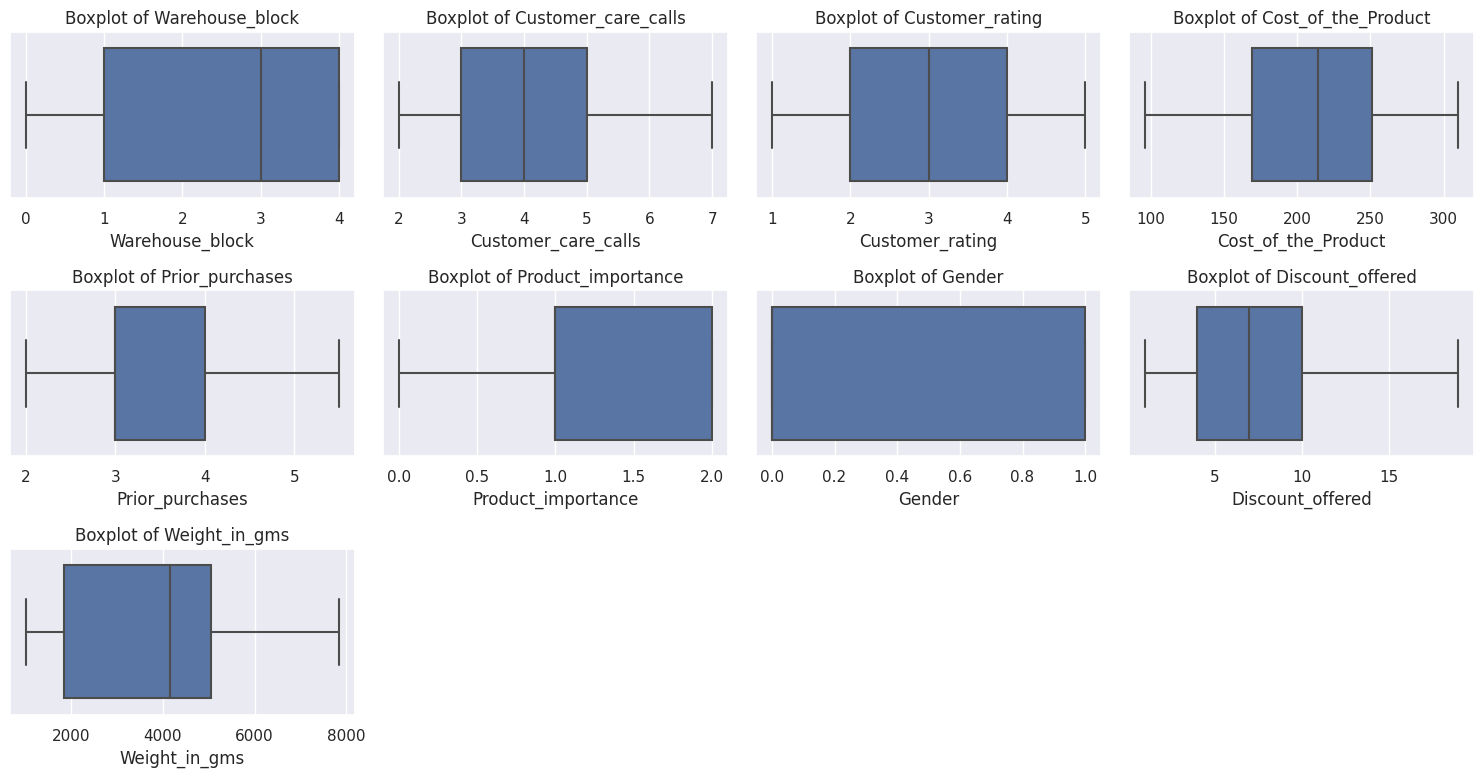

In [39]:
attributes= ["Warehouse_block","Customer_care_calls",
             "Customer_rating","Cost_of_the_Product",
             "Prior_purchases","Product_importance",
             "Gender","Discount_offered","Weight_in_gms"]
plt.figure(figsize=(15,10))
for i,j in zip(range(1,10),attributes):
    plt.subplot(4,4,i)
    sns.boxplot(data=df1, x=j)
    plt.tight_layout()
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

In [40]:
X=df1.drop(columns=['Reached.on.Time_Y.N'])
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3.0,1,0,19.0,1233
1,4,0,4,5,216,2.0,1,1,19.0,3088
2,0,0,2,2,183,4.0,1,1,19.0,3374
3,1,0,3,3,176,4.0,2,1,10.0,1177
4,2,0,2,2,184,3.0,2,0,19.0,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2,0,1.0,1538
10995,1,2,4,1,232,5.0,2,0,6.0,1247
10996,2,2,5,4,242,5.0,1,0,4.0,1155
10997,4,2,5,2,223,5.5,2,1,2.0,1210


In [41]:
y=df1['Reached.on.Time_Y.N']
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [42]:
df1['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [43]:
Xtrain_out,Xtest_out,Ytrain_out,Ytest_out=train_test_split(X,y,test_size=0.3,random_state=1)

In [44]:
sc=StandardScaler()
Xtrain_out=sc.fit_transform(Xtrain_out)
Xtest_out=sc.transform(Xtest_out)

In [45]:
Rfc=RandomForestClassifier(n_estimators=25,criterion='entropy')
Knn=KNeighborsClassifier(n_neighbors=3)
Sv=SVC(kernel='rbf')
Nb=BernoulliNB()
lst=[Knn,Sv,Nb,Rfc]
score3=[]
for i in lst:
  print('*'*100)
  i.fit(Xtrain_out,Ytrain_out)
  ypred_out=i.predict(Xtest_out)
  print('Accuracy Score of',i,accuracy_score(ypred_out,Ytest_out)*100)
  model_score=accuracy_score(ypred_out,Ytest_out)*100
  score3.append(model_score)

****************************************************************************************************
Accuracy Score of KNeighborsClassifier(n_neighbors=3) 64.15151515151514
****************************************************************************************************
Accuracy Score of SVC() 66.6969696969697
****************************************************************************************************
Accuracy Score of BernoulliNB() 65.87878787878788
****************************************************************************************************
Accuracy Score of RandomForestClassifier(criterion='entropy', n_estimators=25) 64.24242424242425


In [46]:
Algorithm_Used=["KNN",'SVM','NAIVE BAYES','RANDOM FOREST']
Accuracy3=score3
data1=pd.DataFrame({'Algorithm':Algorithm_Used,'Accuracy':Accuracy},index=[1,2,3,4])
data1.style.highlight_max(subset='Accuracy',color='red')

,Algorithm,Accuracy
1,KNN,64.272727
2,SVM,67.212121
3,NAIVE BAYES,68.181818
4,RANDOM FOREST,65.000000


**Comapring The Accuracy score of Different Algorithms**

In [47]:
Algorithm=['Knn','Svm','Naive','Random Forest']
Accuracy=score
Accuracy1=score1
Accuracy2=score2
Accuracy3=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy,'Balancing':Accuracy1,'PCA':Accuracy2,'Outlier':Accuracy3},index=[1,2,3,4])
Data1.style.highlight_max(subset='Balancing',color='green')

,Algorithm,Accuracy,Balancing,PCA,Outlier
1,Knn,64.272727,95.791805,63.121212,64.151515
2,Svm,67.212121,94.352159,66.424242,66.696970
3,Naive,68.181818,93.410853,65.424242,65.878788
4,Random Forest,65.000000,95.514950,64.757576,64.242424


By creating different **ML models** using KNN,SVM,Naive Bayes and RandomForestClassifier we have found that the **RandomForestClassifier** yeilds the higher accuracy score of **96.204620**